In [47]:
cls_path = "/storage/slurm/schnackl/fakesync/cav-mae-sync/outputs/mavos/cls_test"

In [48]:
import pickle as pkl
import os
import pandas as pd
import torch
import numpy as np

In [50]:
logs = []
files = os.listdir(cls_path)
for file in files[1:2]:
    if file.endswith(".pkl"):
        print("loadeing", file)
        data = pkl.load(open(os.path.join(cls_path, file), "rb"))
        logs.append(data)
        break

loadeing forward_embeddings_51.pkl


In [51]:
df = pd.DataFrame()
for batch in logs:
    df = pd.concat([df, pd.DataFrame(batch)], ignore_index=True)

# sample size
df = df.sample(n=32, random_state=42)

In [52]:
df.cls_a.iloc[0]

array([[-0.6255353 , -0.2896561 ,  0.9363634 , ...,  0.38927025,
        -0.11336314,  0.33513626],
       [-0.0824845 ,  0.4499269 ,  1.0495034 , ...,  0.41022667,
         0.3120757 , -0.23783581],
       [-0.0824845 ,  0.4499269 ,  1.0495034 , ...,  0.41022667,
         0.3120757 , -0.23783581],
       ...,
       [-0.0824845 ,  0.4499269 ,  1.0495034 , ...,  0.41022667,
         0.3120757 , -0.23783581],
       [-0.0824845 ,  0.4499269 ,  1.0495034 , ...,  0.41022667,
         0.3120757 , -0.23783581],
       [-0.0824845 ,  0.4499269 ,  1.0495034 , ...,  0.41022667,
         0.3120757 , -0.23783581]], shape=(16, 768), dtype=float32)

In [53]:
for col in df.columns:
    print(col, df[col].iloc[0].shape if isinstance(df[col].iloc[0], np.ndarray) else df[col].iloc[0])

video_name /storage/slurm/schnackl/fakesync/data/mavosdd/dataset/english/hififace/12798-MJd6Y50hfAM_51_1.mp4
label tensor([0., 1.])
audio_out (16, 512, 768)
video_out (16, 196, 768)
cls_a (16, 768)
cls_v (16, 768)


In [54]:
cls_v = torch.tensor(df.cls_v.iloc[0])
cls_a = torch.tensor(df.cls_a.iloc[0])

In [55]:
print((cls_v[0:16] - cls_v[0]).abs())
print((cls_a[0:16] - cls_a[0]).abs())
print(cls_a)
# print(torch.allclose(video_flat[0], video_flat[1]))

tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0138, 0.0094, 0.0020,  ..., 0.0143, 0.0096, 0.0001],
        [0.0156, 0.0040, 0.0083,  ..., 0.0246, 0.0084, 0.0026],
        ...,
        [0.0237, 0.0010, 0.0190,  ..., 0.0121, 0.0030, 0.0053],
        [0.0068, 0.0100, 0.0139,  ..., 0.0052, 0.0056, 0.0043],
        [0.0255, 0.0328, 0.0126,  ..., 0.0137, 0.0253, 0.0175]])
tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.5431, 0.7396, 0.1131,  ..., 0.0210, 0.4254, 0.5730],
        [0.5431, 0.7396, 0.1131,  ..., 0.0210, 0.4254, 0.5730],
        ...,
        [0.5431, 0.7396, 0.1131,  ..., 0.0210, 0.4254, 0.5730],
        [0.5431, 0.7396, 0.1131,  ..., 0.0210, 0.4254, 0.5730],
        [0.5431, 0.7396, 0.1131,  ..., 0.0210, 0.4254, 0.5730]])
tensor([[-0.6255, -0.2897,  0.9364,  ...,  0.3893, -0.1134,  0.3351],
        [-0.0825,  0.4499,  1.0495,  ...,  0.4102,  0.3121, -0.2378],
        [-0.0825,  0.4499,  1.0495,  ...,  0.4102,  0.3121, -0.2

In [56]:
np.mean(df.cls_a.iloc[0], axis=0)
# only first entry similar

array([-1.16425164e-01,  4.03702945e-01,  1.04243219e+00, -1.37786937e+00,
        3.18865657e-01, -6.46461129e-01,  5.03460526e-01, -2.18162775e+00,
        8.14958096e-01,  4.74931151e-01, -9.27579463e-01, -1.05475295e+00,
        1.47869158e+00,  7.84361899e-01, -1.49940237e-01, -1.18942845e+00,
       -6.70245349e-01,  4.46898907e-01,  1.58900797e+00,  9.49644387e-01,
        5.38232744e-01, -2.61872202e-01, -1.02022219e+00,  1.27468967e+00,
       -6.96475338e-03,  2.03807831e-01, -1.99147654e+00, -1.15411556e+00,
       -4.90417719e-01, -7.21097410e-01, -1.20005794e-01,  7.48672485e-01,
       -8.50442171e-01,  4.61481661e-01,  1.02311778e+00,  1.09392381e+00,
       -3.10824251e+00,  2.13565278e+00,  2.69956678e-01, -1.06194496e+00,
        4.65631753e-01,  9.64828908e-01, -1.21112382e+00,  9.51535642e-01,
       -3.50985360e+00, -8.75271320e-01, -1.39202356e-01,  1.46860850e+00,
       -1.55629718e+00, -1.11753333e+00, -4.54930335e-01,  9.79359448e-03,
        1.47233307e-01,  

In [ ]:
df.head()

,video_name,label,audio_out,video_out,cls_a,cls_v
52,/storage/slurm/schnackl/fakesync/data/mavosdd/...,"[tensor(1.), tensor(0.)]","[[[-0.19894058, -0.8609357, 0.8028482, -1.1313...","[[[-1.1269327, -1.4672871, -0.13683648, 0.8355...","[[-0.62150526, -0.4241253, 0.9617543, -0.90936...","[[-0.3705514, -0.7080845, -0.18156578, -0.2195..."
58,/storage/slurm/schnackl/fakesync/data/mavosdd/...,"[tensor(0.), tensor(1.)]","[[[-0.9225807, -0.81439304, 0.25333524, -1.717...","[[[-1.0257769, -1.1024891, -2.0295758, -2.4635...","[[-0.9083925, -0.8277528, 0.66208553, -0.95981...","[[-0.8415613, -0.5722408, -1.5394307, -3.16460..."
0,/storage/slurm/schnackl/fakesync/data/mavosdd/...,"[tensor(0.), tensor(1.)]","[[[-0.5589631, -0.84041363, 0.70586246, -1.324...","[[[-0.6951295, -1.1830536, 0.24808078, 0.99645...","[[-0.9936347, -0.9553155, 0.80656016, -1.11417...","[[-0.34558532, -0.39571723, 0.44039652, 0.1345..."
44,/storage/slurm/schnackl/fakesync/data/mavosdd/...,"[tensor(1.), tensor(0.)]","[[[-0.3732348, -0.9131247, 0.48985234, -1.1005...","[[[-1.1135234, -1.6787611, -0.50823045, -0.213...","[[-0.5680794, -0.4946795, 0.9680055, -0.913018...","[[-0.7581869, -1.0679979, -0.18304187, -0.6920..."
5,/storage/slurm/schnackl/fakesync/data/mavosdd/...,"[tensor(0.), tensor(1.)]","[[[-0.6651619, -0.45286945, 0.48892394, -1.049...","[[[-0.56534547, -1.581292, 0.09792678, 1.49972...","[[-0.5029565, -0.12100143, 0.98296005, -1.0419...","[[-0.26788437, -0.94541115, 0.20680577, 0.9553..."


In [ ]:
df.cls_a.iloc[0]

array([[-0.62150526, -0.4241253 ,  0.9617543 , ...,  0.42458194,
        -0.04021762,  0.36957574],
       [-0.0824845 ,  0.4499269 ,  1.0495034 , ...,  0.41022667,
         0.3120757 , -0.23783581],
       [-0.0824845 ,  0.4499269 ,  1.0495034 , ...,  0.41022667,
         0.3120757 , -0.23783581],
       ...,
       [-0.0824845 ,  0.4499269 ,  1.0495034 , ...,  0.41022667,
         0.3120757 , -0.23783581],
       [-0.0824845 ,  0.4499269 ,  1.0495034 , ...,  0.41022667,
         0.3120757 , -0.23783581],
       [-0.0824845 ,  0.4499269 ,  1.0495034 , ...,  0.41022667,
         0.3120757 , -0.23783581]], shape=(16, 768), dtype=float32)

In [ ]:
df.cls_a.iloc[0].shape

(16, 768)

In [ ]:
# import cosine similarity
from sklearn.metrics.pairwise import cosine_similarity
# do per time step the cosine sim between cls_a and cls_b
cos_sim = cosine_similarity(
    np.array(df.cls_a.iloc[0]),
    np.array(df.cls_v.iloc[0])
)


array([[-0.02553898, -0.02631318, -0.03099363, -0.02823321, -0.02573715],
       [-0.01313349, -0.01366069, -0.02165243, -0.01948981, -0.01130225],
       [-0.01313349, -0.01366069, -0.02165243, -0.01948981, -0.01130225],
       [-0.01313349, -0.01366069, -0.02165243, -0.01948981, -0.01130225],
       [-0.01313349, -0.01366069, -0.02165243, -0.01948981, -0.01130225]],
      dtype=float32)

In [ ]:
import numpy as np
A = np.array(df.cls_a.iloc[0])  # shape (T, D)
V = np.array(df.cls_v.iloc[0])  # shape (T, D)
# A, V: shape (T, D)
A_norm = A / np.linalg.norm(A, axis=1, keepdims=True)
V_norm = V / np.linalg.norm(V, axis=1, keepdims=True)

# elementwise dot product across features → cosine similarity per timestep
similarities = np.sum(A_norm * V_norm, axis=1)  # shape (T,)
similarities

array([-0.02553897, -0.0136607 , -0.02165243, -0.01948981, -0.01130225,
       -0.0131823 , -0.01242083, -0.01579013, -0.0151884 , -0.0117459 ,
       -0.00958932, -0.00958308, -0.00955123, -0.00924379, -0.0106106 ,
       -0.01052123], dtype=float32)

In [ ]:
import random

In [ ]:
a = logs[0][4]
b = logs[0][5]
b_shuffled = b
random.shuffle(b_shuffled)
y = cosine_similarity(a, b)
# histogram of y
import matplotlib.pyplot as plt

plt.hist(y, bins=20)
plt.xlabel('Cosine Similarity')
plt.ylabel('Frequency')
plt.title('Histogram of Cosine Similarity between cls_a and cls_v')
plt.show()

KeyError: 4

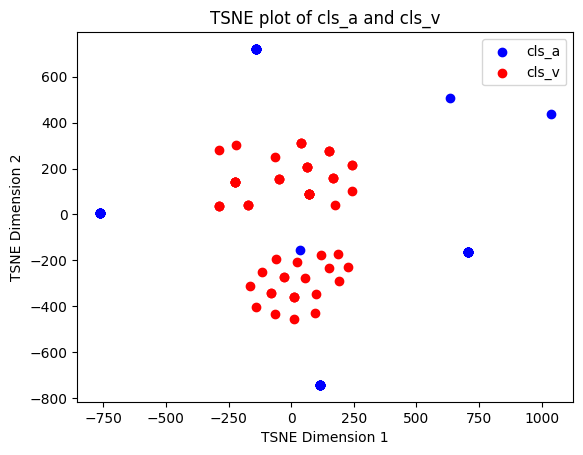

In [ ]:
# tsne plot of cls_a and cls_v
from sklearn.manifold import TSNE   
import numpy as np
tsne = TSNE(n_components=2, random_state=0)
a_2d = tsne.fit_transform(a)

# scatter plot of a_2d
plt.scatter(a_2d[:, 0], a_2d[:, 1], c='blue', label='cls_a')
b_2d = tsne.fit_transform(b)
plt.scatter(b_2d[:, 0], b_2d[:, 1], c='red', label='cls_v')
plt.xlabel('TSNE Dimension 1')
plt.ylabel('TSNE Dimension 2')
plt.title('TSNE plot of cls_a and cls_v')
plt.legend()

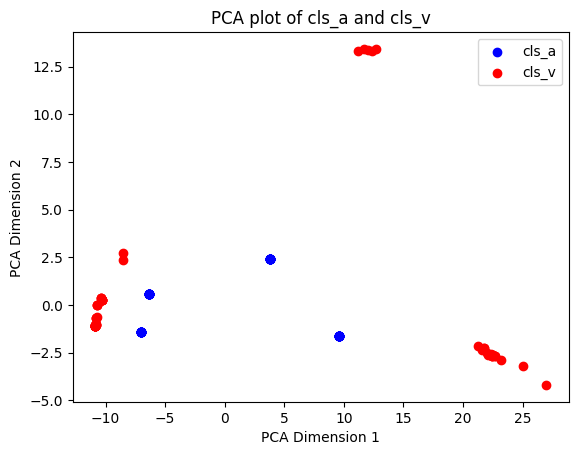

In [ ]:
# pca
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
a_2d_pca = pca.fit_transform(a)
b_2d_pca = pca.fit_transform(b)
# scatter plot of a_2d_pca and b_2d_pca
plt.scatter(a_2d_pca[:, 0], a_2d_pca[:, 1], c='blue', label='cls_a')
plt.scatter(b_2d_pca[:, 0], b_2d_pca[:, 1], c='red', label='cls_v')
plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.title('PCA plot of cls_a and cls_v')
plt.legend()
plt.show()

In [ ]:
np.sum(np.abs(np.array(logs[0][5][0]) - np.array(logs[0][5][3])))

/tmp/ipykernel_1627056/2195032062.py:1: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  np.sum(np.abs(np.array(logs[0][5][0]) - np.array(logs[0][5][3])))


np.float32(50.678024)

In [ ]:
# scatter plot of cls_a vs cls_v